# Feature Matching

+ Template matching requires an exact copy of the image to find

+ Feature matching extracts defining key features from an input image (using ideas from corner, edge, and contour detection).
+ Then using a distance calculation, finds all the matches in a secondary image
+ This means we are no longer required to have an exact copy of the target image

### Three main methods
- Brute-Force Matching with ORB Descriptors
- Brute-Force Matching with SIFT
- FLANN based Matcher

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [4]:
reeses = cv2.imread("../imgs/reeses_puffs.png",0)

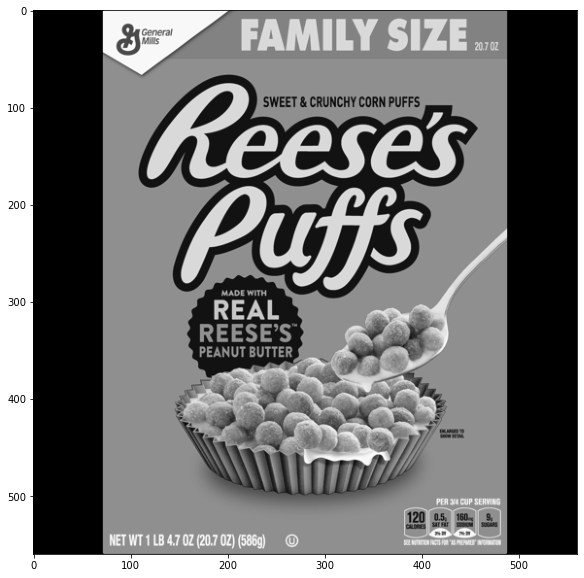

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread("../imgs/many_cereals.jpg", 0)

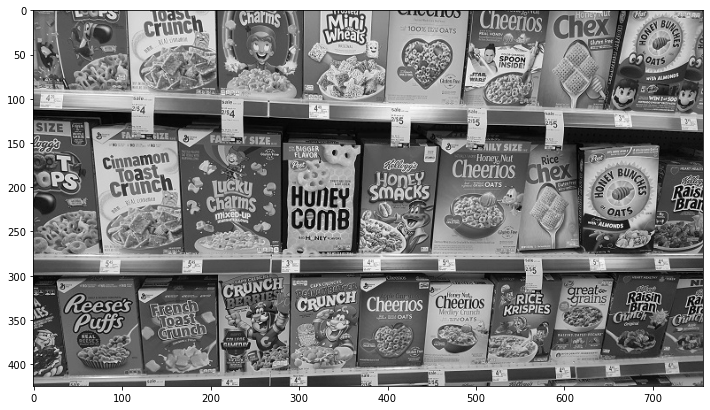

In [7]:
display(cereals)

#### Brute-Force Matching with ORB Descriptors

In [8]:
orb = cv2.ORB_create()

In [10]:
kp1,des1 = orb.detectAndCompute(reeses,None)

In [11]:
kp2,des2 = orb.detectAndCompute(cereals,None)

In [12]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [13]:
matches = bf.match(des1,des2)

In [18]:
dir(matches[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'distance',
 'imgIdx',
 'queryIdx',
 'trainIdx']

In [19]:
matches = sorted(matches, key=lambda x:x.distance)

In [20]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[0:25],None,flags=2)

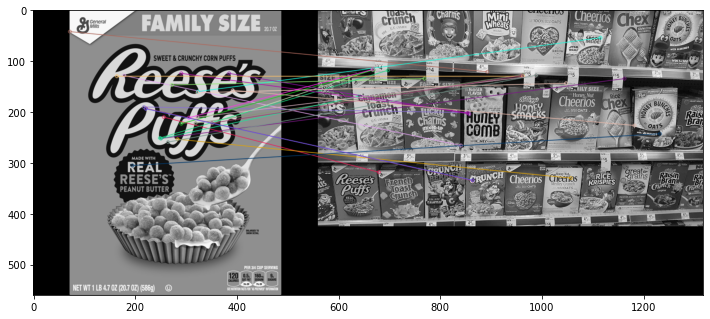

In [21]:
display(reeses_matches)